Analysis Discussion
1. The columns that had an even distribution were the 'mileage' and 'count' columns. Viewing the histograms, it can be seen that there are not multiple peaks throughout, but instead a semi-smooth graph. 
2. In this particular dataset there were not any missing values however, to check for this I used a for loop to iterate through the columns of the dataframe. Each iterations summed the amount of N/A values in the column and printed them out. If there were N/A values, I would insert the average for numerical values and for categorical values I would have inserted the most common name.
3. To code the categorical data, I used one-hot encoding and label encoding. The two columns that I used label encoding on were 'condition' and 'year'.
For these columns there was an apparent order which allowed for label encoding. For example, to simplify this process 'used' was encoded as '0' and 'new' was encoded as '1'. For the other three columns that did not have an apparent order I used one hot encoding to encode the data within the columns.
4. In this particular dataset, there were not any outliers. To be sure of this I used boxplots to show any outliers that might have been in the data. If there were any outliers I would have used IQR to remove them.
5. For this data I chose to normalize the data. I chose normalization since the values have a known range. 
6. When using a regressiong model, each model performed well considering the given data. The R squared model performed with a score of '-0.0006348', the Root Mean Squared error performed with a score of '0.083' and finally the Mean Absolute Error performed with a score of '0.249'. I would say that the Root Mean Square Error performed the best.
7. The Root Mean Squared Error and the Mean Absolute Error models seemed to perform similarly when using the testing and the training set. However, the R Squared seemed to overfit the data. With a score of roughly '0.0006' on the training set and '-0.0006' on the testing set. This model seemed to have a little variance in the training.



1. Dataset Link: https://www.kaggle.com/datasets/zain280/car-dataset
2. Github Link: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rawDF = pd.read_csv("Car_Data.csv")

rawDF.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [3]:
rawDF.describe()



,ID,Year,Mileage,Price
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,2006.03409,99819.395000,42534.519370
std,28867.657797,9.52722,57710.087058,21632.296692
min,1.000000,1990.00000,2.000000,5000.000000
25%,25000.750000,1998.00000,49996.250000,23826.750000
50%,50000.500000,2006.00000,99807.000000,42563.500000
75%,75000.250000,2014.00000,149841.250000,61197.500000
max,100000.000000,2022.00000,199998.000000,80000.000000


In [4]:
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f'The number of na values in the {col} col is {naCount}')

The number of na values in the ID col is 0
The number of na values in the Brand col is 0
The number of na values in the Model col is 0
The number of na values in the Year col is 0
The number of na values in the Color col is 0
The number of na values in the Mileage col is 0
The number of na values in the Price col is 0
The number of na values in the Condition col is 0


In [5]:
rawDF.dtypes

ID            int64
Brand        object
Model        object
Year          int64
Color        object
Mileage       int64
Price         int64
Condition    object
dtype: object

In [6]:
cleanedDF = rawDF.drop('ID', axis=1)


In [7]:
cleanedDF.head()

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [8]:
categoricalCol = ["Brand","Model","Color","Condition", "Year"]
numericalCol = ["Mileage","Price"]

In [9]:
# Function to make Bar graphs for the specified columns
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")

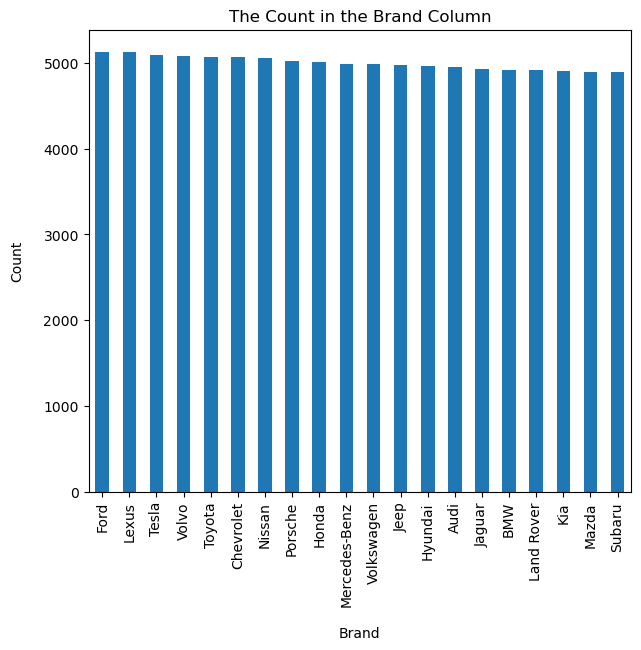

In [10]:
makeBarValueCount(cleanedDF, 'Brand')

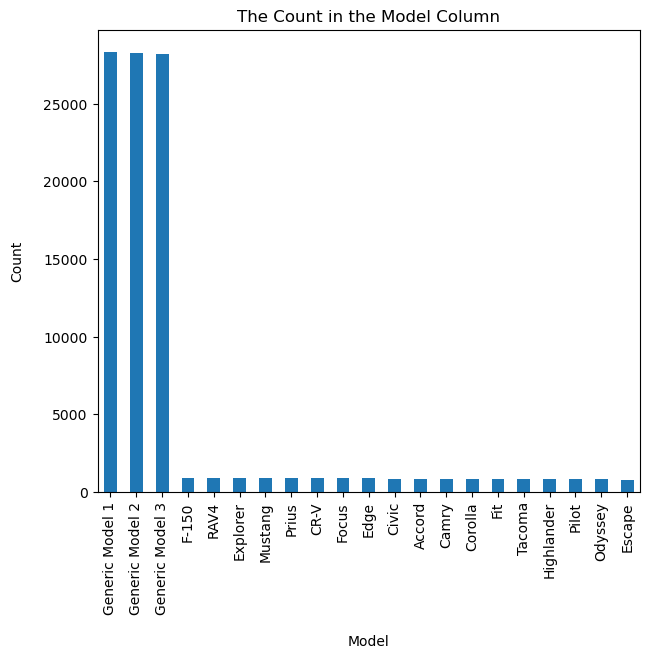

In [11]:
makeBarValueCount(cleanedDF, 'Model')

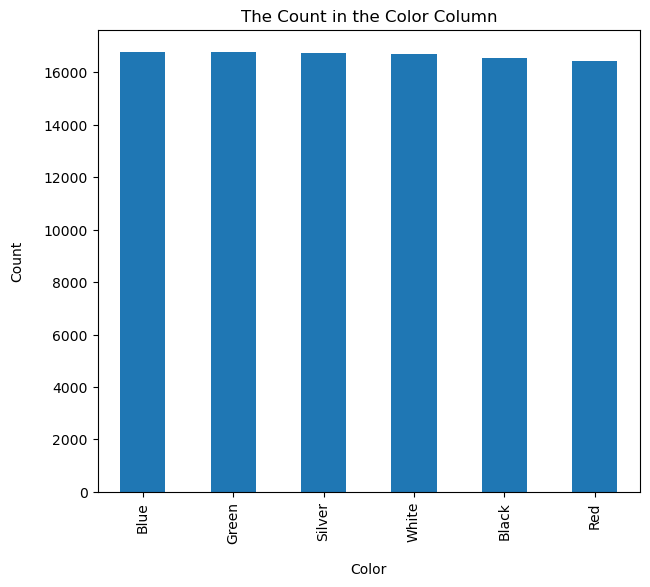

In [12]:
makeBarValueCount(cleanedDF, 'Color')

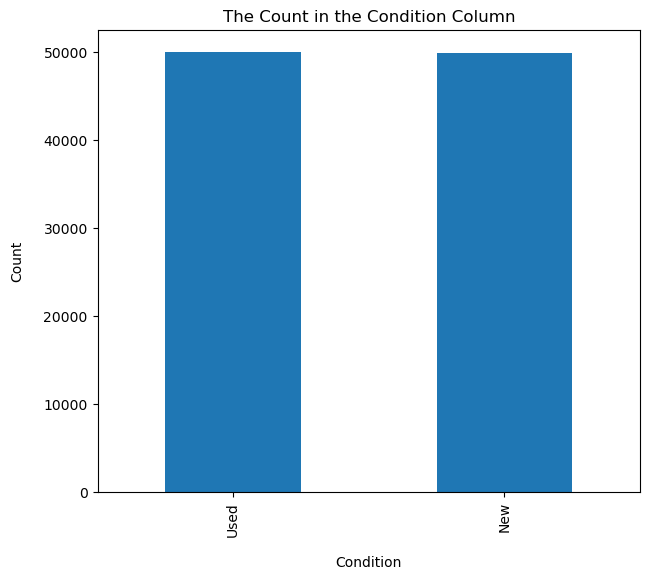

In [13]:
makeBarValueCount(cleanedDF, 'Condition')

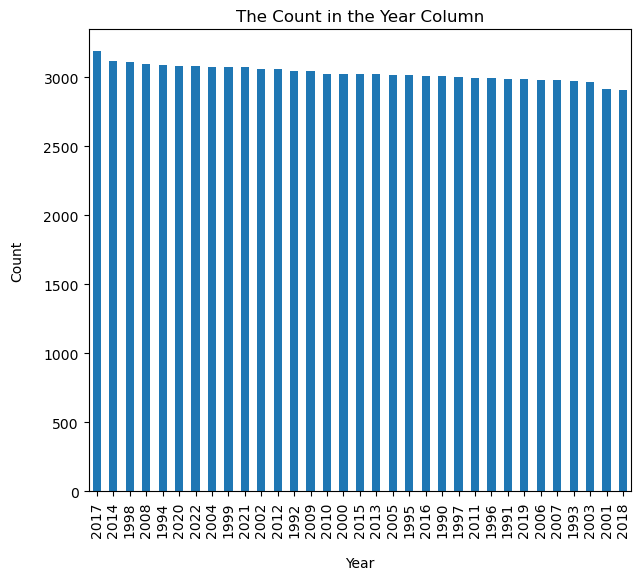

In [14]:
makeBarValueCount(cleanedDF, 'Year')


In [15]:
# Function to make Histograms for the specified columns
def makeHistValueCount(aDF, colName):
    aDF[colName].plot(kind='hist', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")


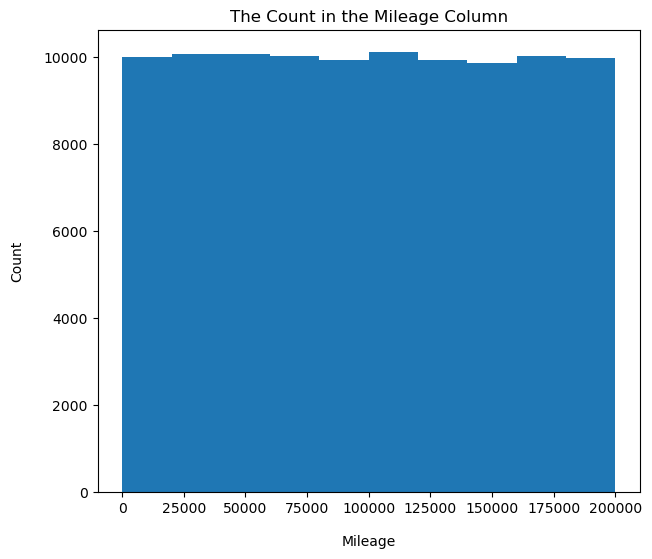

In [16]:
makeHistValueCount(cleanedDF, 'Mileage')

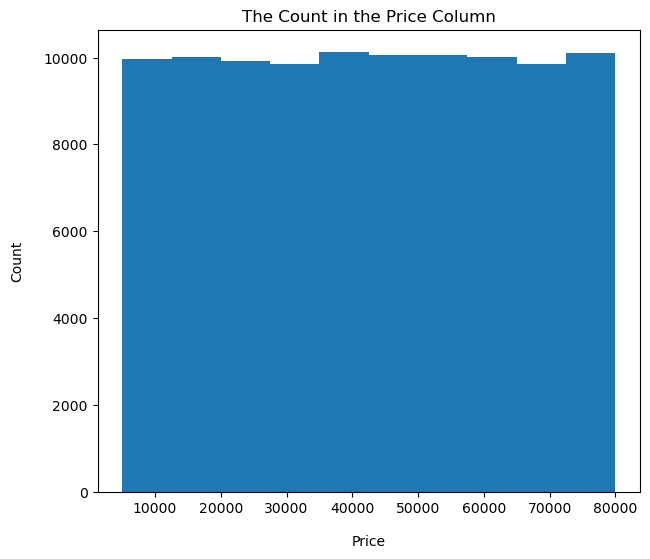

In [17]:
makeHistValueCount(cleanedDF, 'Price')

In [18]:
def getLabelList(n):
    labelList =[]
    for i in range(n):
        labelList.append(i)
    return labelList


In [19]:
yearGroup = cleanedDF.groupby("Year").size()

yearGroup


Year
1990    3006
1991    2988
1992    3048
1993    2975
1994    3090
1995    3013
1996    2993
1997    3002
1998    3112
1999    3071
2000    3024
2001    2911
2002    3061
2003    2968
2004    3072
2005    3018
2006    2980
2007    2979
2008    3096
2009    3041
2010    3025
2011    2996
2012    3057
2013    3022
2014    3114
2015    3022
2016    3008
2017    3187
2018    2904
2019    2986
2020    3082
2021    3070
2022    3079
dtype: int64

In [20]:
def yearList():
    yearList = []
    for i in range(1990, 2023):
        yearList.append(i)
    return yearList
print(yearList())

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [21]:
yearList = yearList()
imputedDF = cleanedDF
imputedDF['Year'] = imputedDF['Year'].replace(yearList, getLabelList(len(yearList)))

In [22]:
imputedDF.head()

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,13,Blue,22932,65732,New
1,Jaguar,Generic Model 2,13,Silver,89937,58620,New
2,Land Rover,Generic Model 2,32,Green,36616,50574,New
3,Porsche,Generic Model 2,7,Black,82812,35436,Used
4,Land Rover,Generic Model 3,10,Black,184616,63880,Used


In [23]:
conditionList = ['Used','New']
imputedDF['Condition'] = imputedDF['Condition'].replace(conditionList, getLabelList(len(conditionList)))

In [24]:
imputedDF.head()

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,13,Blue,22932,65732,1
1,Jaguar,Generic Model 2,13,Silver,89937,58620,1
2,Land Rover,Generic Model 2,32,Green,36616,50574,1
3,Porsche,Generic Model 2,7,Black,82812,35436,0
4,Land Rover,Generic Model 3,10,Black,184616,63880,0


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

columnsToEncode = ['Brand', 'Color', 'Model']

# Creating a ColumnTransformer with OneHotEncoder for specified columns
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(sparse=False), columnsToEncode)],remainder='drop')

# Perform one-hot encoding on the specified columns
encodedData = preprocessor.fit_transform(imputedDF)

# Convert the result back to a DataFrame
encodedDF = pd.DataFrame(encodedData, columns=list(preprocessor.get_feature_names_out()))

# Drop the original columns from the DataFrame
cleanedDF = imputedDF.drop(columns=columnsToEncode)

# Concatenate the cleaned DataFrame and the one-hot encoded DataFrame 
cleanedDF = pd.concat([cleanedDF, encodedDF], axis=1)

c:\Users\brayj\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
cleanedDF.head()

,Year,Mileage,Price,Condition,onehot__Brand_Audi,onehot__Brand_BMW,onehot__Brand_Chevrolet,onehot__Brand_Ford,onehot__Brand_Honda,onehot__Brand_Hyundai,...,onehot__Model_Generic Model 1,onehot__Model_Generic Model 2,onehot__Model_Generic Model 3,onehot__Model_Highlander,onehot__Model_Mustang,onehot__Model_Odyssey,onehot__Model_Pilot,onehot__Model_Prius,onehot__Model_RAV4,onehot__Model_Tacoma
0,13,22932,65732,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,89937,58620,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32,36616,50574,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,82812,35436,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,184616,63880,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Function to create box plots for each column
import seaborn as sns
def makeBoxPlot(aDF, col):  
    sns.boxplot(aDF[col])
    plt.title(f"Box Plot of {col}")

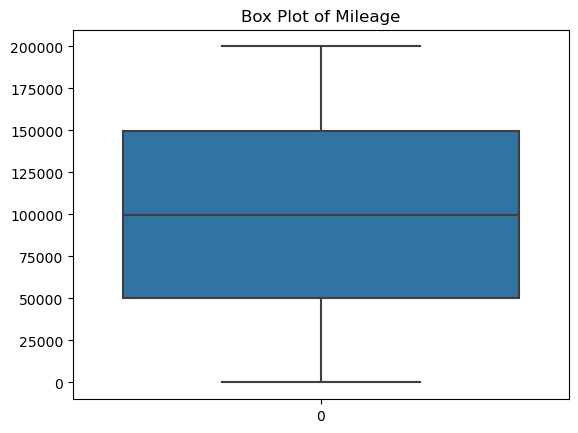

In [28]:
makeBoxPlot(cleanedDF,'Mileage')

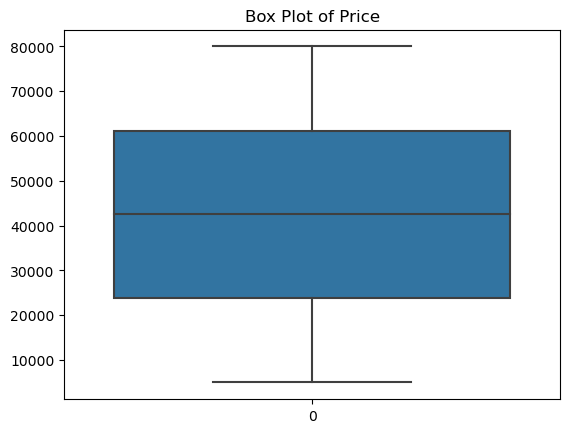

In [29]:
makeBoxPlot(cleanedDF,'Price')

In [30]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# initialize the DF
normalizedDF = cleanedDF

normalizedDF[['Price','Mileage']] = scaler.fit_transform(cleanedDF[['Price','Mileage']])

normalizedDF.head()

,Year,Mileage,Price,Condition,onehot__Brand_Audi,onehot__Brand_BMW,onehot__Brand_Chevrolet,onehot__Brand_Ford,onehot__Brand_Honda,onehot__Brand_Hyundai,...,onehot__Model_Generic Model 1,onehot__Model_Generic Model 2,onehot__Model_Generic Model 3,onehot__Model_Highlander,onehot__Model_Mustang,onehot__Model_Odyssey,onehot__Model_Pilot,onehot__Model_Prius,onehot__Model_RAV4,onehot__Model_Tacoma
0,13,0.114652,0.809760,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,0.449684,0.714933,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32,0.183074,0.607653,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,0.414058,0.405813,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,0.923088,0.785067,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
xDF = normalizedDF.drop('Price', axis=1)
xDF.head()

,Year,Mileage,Condition,onehot__Brand_Audi,onehot__Brand_BMW,onehot__Brand_Chevrolet,onehot__Brand_Ford,onehot__Brand_Honda,onehot__Brand_Hyundai,onehot__Brand_Jaguar,...,onehot__Model_Generic Model 1,onehot__Model_Generic Model 2,onehot__Model_Generic Model 3,onehot__Model_Highlander,onehot__Model_Mustang,onehot__Model_Odyssey,onehot__Model_Pilot,onehot__Model_Prius,onehot__Model_RAV4,onehot__Model_Tacoma
0,13,0.114652,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,0.449684,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32,0.183074,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,0.414058,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,0.923088,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
yDF = normalizedDF['Price']
yDF.head()


0    0.809760
1    0.714933
2    0.607653
3    0.405813
4    0.785067
Name: Price, dtype: float64

In [33]:
yDF.tail()

99995    0.356827
99996    0.978347
99997    0.542413
99998    0.134467
99999    0.238213
Name: Price, dtype: float64

In [34]:
# Initialize and split data for model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF, 
                                                test_size=0.33)

model = LinearRegression().fit(xTrain, yTrain)

In [35]:
yTrainPred = model.predict(xTrain)

yTestPred = model.predict(xTest)


In [36]:
'''
This model has too much variance, since it performs 
much better on the training set.
'''
from sklearn.metrics import r2_score

r2_train = r2_score(yTrain, yTrainPred)
print(f"R2 Score on Training Set: {r2_train}")

r2_test = r2_score(yTest, yTestPred)
print(f"R2 Score on Testing Set: {r2_test}")

R2 Score on Training Set: 0.0006974109121486993
R2 Score on Testing Set: -0.0007561226724965842


In [37]:
'''
This model model seems to have a little variance, since
it performs slightly better on the training set.
'''
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(yTrain, yTrainPred)
print(f"Mean Absolute Error on Training Set: {mae_train}")

mae_test = mean_absolute_error(yTest, yTestPred)
print(f"Mean Absolute Error on Testing Set: {mae_test}")

Mean Absolute Error on Training Set: 0.2495332097630667
Mean Absolute Error on Testing Set: 0.24963725142894708


In [38]:
'''
This model seem to have a little variance, since
it performs slightly better on the training set.
'''
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(yTrain, yTrainPred)
print(f"Mean Squared Error on Training Set: {mse_train}")

mse_test = mean_squared_error(yTest, yTestPred)
print(f"Mean Squared Error on Testing Set: {mse_test}")

Mean Squared Error on Training Set: 0.0831271855259328
Mean Squared Error on Testing Set: 0.0832664975353601
